# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.munResLat.sort_values()

25681   -13.49976
25927   -13.49976
25553   -13.49976
11425   -13.49976
25965   -13.49976
           ...   
19898    -8.76889
19899    -8.76889
19877    -8.76889
7972     -8.76889
1863          NaN
Name: munResLat, Length: 27028, dtype: float64

In [4]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
lat = pd.cut(sinasc_raw['munResLat'],[-15,-10.5,0])
lat

0        (-15.0, -10.5]
1        (-15.0, -10.5]
2        (-15.0, -10.5]
3        (-15.0, -10.5]
4        (-15.0, -10.5]
              ...      
27023    (-15.0, -10.5]
27024    (-15.0, -10.5]
27025    (-15.0, -10.5]
27026    (-15.0, -10.5]
27027    (-15.0, -10.5]
Name: munResLat, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(-15.0, -10.5] < (-10.5, 0.0]]

In [6]:
sinasc_raw.groupby(lat)['CONSULTAS'].agg(['mean', 'median', 'sum', 'min', 'max', 'std','var'])

,mean,median,sum,min,max,std,var
munResLat,,,,,,,
"(-15.0, -10.5]",3.694297,4.0,48000,1,9,0.643372,0.413928
"(-10.5, 0.0]",3.467436,4.0,48662,1,9,0.888240,0.788970


In [7]:
sinasc_raw.groupby(lat)['QTDFILVIVO'].agg(['mean', 'median', 'sum', 'min', 'max', 'std','var'])

,mean,median,sum,min,max,std,var
munResLat,,,,,,,
"(-15.0, -10.5]",0.980011,1.0,12600.0,0.0,30.0,1.138300,1.295727
"(-10.5, 0.0]",1.129317,1.0,14226.0,0.0,12.0,1.198613,1.436674


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:
sinasc_raw.munResArea.sort_values()

5469       459.978
17881      459.978
19133      459.978
5385       459.978
17832      459.978
           ...    
7348     34096.394
20069    34096.394
7342     34096.394
20709    34096.394
1863           NaN
Name: munResArea, Length: 27028, dtype: float64

In [9]:
area = pd.cut(sinasc_raw['munResArea'], [0,3000,35000])
area

0        (3000, 35000]
1        (3000, 35000]
2        (3000, 35000]
3        (3000, 35000]
4        (3000, 35000]
             ...      
27023    (3000, 35000]
27024    (3000, 35000]
27025    (3000, 35000]
27026    (3000, 35000]
27027        (0, 3000]
Name: munResArea, Length: 27028, dtype: category
Categories (2, interval[int64, right]): [(0, 3000] < (3000, 35000]]

In [10]:
sinasc_raw.groupby(area)['APGAR1'].agg(['sum', 'mean', 'median', 'min', 'max', 'std', 'var'])

,sum,mean,median,min,max,std,var
munResArea,,,,,,,
"(0, 3000]",42070.0,8.073306,8.0,0.0,10.0,1.008790,1.017658
"(3000, 35000]",177079.0,8.152808,8.0,0.0,10.0,0.978517,0.957495


In [11]:
sinasc_raw.groupby(area)['APGAR5'].agg(['sum', 'mean', 'median', 'min', 'max', 'std', 'var'])

,sum,mean,median,min,max,std,var
munResArea,,,,,,,
"(0, 3000]",47560.0,9.130351,9.0,0.0,10.0,0.801124,0.641799
"(3000, 35000]",199579.0,9.190836,9.0,0.0,10.0,0.787591,0.620299


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [12]:
alt = pd.qcut(sinasc_raw['munResAlt'], 2)
alt

0        (153.0, 595.0]
1        (153.0, 595.0]
2        (153.0, 595.0]
3        (153.0, 595.0]
4        (153.0, 595.0]
              ...      
27023    (153.0, 595.0]
27024    (153.0, 595.0]
27025    (153.0, 595.0]
27026    (153.0, 595.0]
27027    (153.0, 595.0]
Name: munResAlt, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(84.999, 153.0] < (153.0, 595.0]]

In [13]:
sinasc_raw.groupby(alt)['QTDGESTANT'].agg(['sum', 'mean', 'median', 'min', 'max', 'std', 'var'])

,sum,mean,median,min,max,std,var
munResAlt,,,,,,,
"(84.999, 153.0]",17826.0,1.425738,1.0,0.0,52.0,1.560818,2.436154
"(153.0, 595.0]",15090.0,1.133564,1.0,0.0,12.0,1.223395,1.496696


In [14]:
sinasc_raw.groupby(alt)['QTDPARTNOR'].agg(['sum', 'mean', 'median', 'min', 'max', 'std', 'var'])

,sum,mean,median,min,max,std,var
munResAlt,,,,,,,
"(84.999, 153.0]",9307.0,0.780527,0.0,0.0,40.0,1.362645,1.856801
"(153.0, 595.0]",5264.0,0.398064,0.0,0.0,41.0,1.018270,1.036874


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [15]:
mapa = {
    "Candeias do Jamari":"Porto Velho",
    "Guajará-Mirim":"Porto Velho",
    "Itapuã do Oeste":"Porto Velho",
    "Nova Mamoré":"Porto Velho",
    "Porto Velho":"Porto Velho",
    "Alto Paraíso":"Ariquemes",
    "Ariquemes":"Ariquemes",
    "Buritis":"Ariquemes",
    "Cacaulândia":"Ariquemes",
    "Campo Novo de Rondônia":"Ariquemes",
    "Cujubim":"Ariquemes",
    "Monte Negro":"Ariquemes",
    "Rio Crespo":"Ariquemes",
    "Governador Jorge Teixeira":"Jaru",
    "Jaru":"Jaru",
    "Machadinho D'Oeste":"Jaru",
    "Theobroma":"Jaru",
    "Vale do Anari":"Jaru",
    "Alvorada D'Oeste":"Ji-Paraná",
    "Costa Marques":"Ji-Paraná",
    "Ji-Paraná":"Ji-Paraná",
    "Mirante da Serra":"Ji-Paraná",
    "Nova União":"Ji-Paraná",
    "Ouro Preto do Oeste":"Ji-Paraná",
    "Presidente Médici":"Ji-Paraná",
    "São Francisco do Guaporé":"Ji-Paraná",
    "São Miguel do Guaporé":"Ji-Paraná",
    "Seringueiras":"Ji-Paraná",
    "Teixeirópolis":"Ji-Paraná",
    "Urupá":"Ji-Paraná",
    "Vale do Paraíso":"Ji-Paraná",
    "Alta Floresta D'Oeste":"Cacoal",
    "Alto Alegre dos Parecis":"Cacoal",
    "Cacoal":"Cacoal",
    "Castanheiras":"Cacoal",
    "Espigão D'Oeste":"Cacoal",
    "Ministro Andreazza":"Cacoal",
    "Nova Brasilândia D'Oeste":"Cacoal",
    "Novo Horizonte do Oeste":"Cacoal",
    "Parecis":"Cacoal",
    "Pimenta Bueno":"Cacoal",
    "Primavera de Rondônia":"Cacoal",
    "Rolim de Moura":"Cacoal",
    "Santa Luzia D'Oeste":"Cacoal",
    "São Felipe D'Oeste":"Cacoal",
    "Cabixi":"Vilhena",
    "Cerejeiras":"Vilhena",
    "Chupinguaia":"Vilhena",
    "Colorado do Oeste":"Vilhena",
    "Corumbiara":"Vilhena",
    "Pimenteiras do Oeste":"Vilhena",
    "Vilhena":"Vilhena"
}

In [16]:
# criando nova coluna com as regioes

sinasc_raw['regiao'] = sinasc_raw['munResNome'].map(mapa)
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,regiao
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Cacoal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Cacoal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Cacoal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Cacoal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Cacoal


In [17]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC']).dt.strftime("%B")
sinasc_raw['DTNASC']

0        February
1        February
2        February
3           March
4           March
           ...   
27023    December
27024     October
27025      August
27026    December
27027    December
Name: DTNASC, Length: 27028, dtype: object

In [18]:
sinasc = sinasc_raw.set_index('munResNome')
sinasc

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea,regiao
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Cacoal
Alta Floresta D'Oeste,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Cacoal
Alta Floresta D'Oeste,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Cacoal
Alto Alegre dos Parecis,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Rondônia,-12.13178,-61.85308,397.0,3958.273,Cacoal
Alta Floresta D'Oeste,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025,Cacoal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vilhena,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Rondônia,-12.74137,-60.13858,595.0,11518.915,Vilhena
Chupinguaia,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Rondônia,-12.55684,-60.90185,340.0,5126.723,Vilhena
Vilhena,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Rondônia,-12.74137,-60.13858,595.0,11518.915,Vilhena


In [19]:
group = sinasc.groupby([mapa, 'DTNASC']).mean()
group

/tmp/ipykernel_5868/2192576129.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = sinasc.groupby([mapa, 'DTNASC']).mean()


ORIGEM      CODESTAB     CODMUNNASC   LOCNASC  \
munResNome DTNASC                                                     
Ariquemes  April         1.0  3.306660e+06  110015.975352  1.021127   
           August        1.0  3.290572e+06  110015.457692  1.000000   
           December      1.0  3.064160e+06  110012.128631  1.029046   
           February      1.0  3.088631e+06  110055.354701  1.000000   
           January       1.0  3.352119e+06  110780.541985  1.000000   
...                      ...           ...            ...       ...   
Vilhena    March         1.0  2.771487e+06  111807.991111  1.013333   
           May           1.0  2.823023e+06  113974.443350  1.034483   
           November      1.0  2.823992e+06  119210.238532  1.009174   
           October       1.0  2.813838e+06  117209.878924  1.026906   
           September     1.0  2.821570e+06  116382.952381  1.021164   

                       IDADEMAE  ESTCIVMAE     CODOCUPMAE  QTDFILVIVO  \
munResNome DTNASC                                                       
Ariquemes  April      25.411972   2.931900  831266.642336    1.138462   
           August     25.684615   2.461240  824058.294355    1.008403   
           December   24.821577   2.730769  839561.734783    1.066079   
           February   25.316239   2.594714  829076.340708    1.139535   
           January    24.866412   2.789062  826084.923077    0.992063   
...                         ...        ...            ...         ...   
Vilhena    March      26.386667   1.764444  744740.267943    0.973094   
           May        25.586207   1.631841  734578.322404    0.944444   
           November   26.169725   1.816514  770745.171717    0.935484   
           October    26.161435   1.717489  738354.230769    0.882883   
           September  26.407407   1.797872  730296.057803    0.989418   

                      QTDFILMORT      CODMUNRES  ...  STDNNOVA  CODPAISRES  \
munResNome DTNASC                                ...                         
Ariquemes  April        0.254167  110030.130282  ...  1.000000         1.0   
           August       0.300971  110032.784615  ...  0.996154         1.0   
           December     0.363184  110030.348548  ...  1.000000         1.0   
           February     0.325581  110032.837607  ...  1.000000         1.0   
           January      0.212000  110029.835878  ...  1.000000         1.0   
...                          ...            ...  ...       ...         ...   
Vilhena    March        0.283784  110032.302222  ...  1.000000         1.0   
           May          0.303030  110028.871921  ...  1.000000         1.0   
           November     0.211982  110029.876147  ...  1.000000         1.0   
           October      0.357466  110025.860987  ...  1.000000         1.0   
           September    0.216931  110026.608466  ...  1.000000         1.0   

                      TPROBSON  PARIDADE  KOTELCHUCK      CONTADOR  munResLat  \
munResNome DTNASC                                                               
Ariquemes  April      3.950704  0.676056    4.654930  4.139430e+03  -9.961286   
           August     3.953846  0.673077    4.719231  1.484367e+06  -9.991091   
           December   3.858921  0.672199    4.626556  1.484316e+06  -9.988554   
           February   4.307692  0.679487    4.521368  3.156090e+03  -9.943157   
           January    3.862595  0.606870    4.473282  5.903630e+03  -9.981531   
...                        ...       ...         ...           ...        ...   
Vilhena    March      4.088889  0.644444    4.373333  1.761455e+04 -12.845223   
           May        4.231527  0.635468    4.246305  2.529973e+04 -12.861575   
           November   4.224771  0.619266    4.417431  1.520887e+06 -12.875611   
           October    4.147982  0.659193    4.529148  1.514413e+06 -12.874706   
           September  4.375661  0.634921    4.433862  1.511709e+06 -12.868104   

                      munResLon   munResAlt   munResArea  
munResNome DTNASC   

<Axes: xlabel='DTNASC', ylabel='IDADEMAE'>

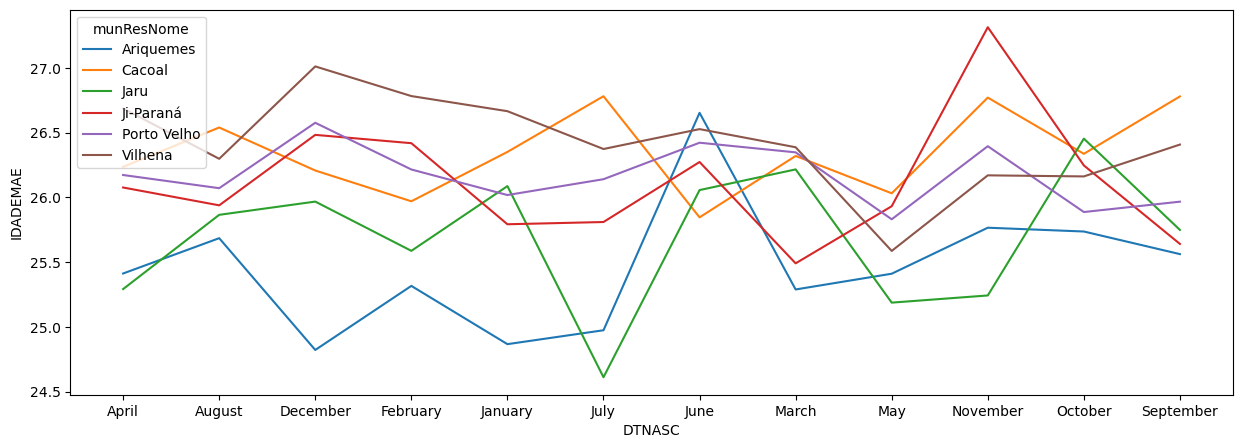

In [20]:
plt.figure(figsize=(15,5))
sns.lineplot(data = group,
              x = 'DTNASC',
              y = 'IDADEMAE',
              hue = 'munResNome')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [21]:
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))
dados_ro.head()

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830


In [26]:
def faixas_idh(x):
    if x>= 0.700:
        return('alto')
    if x >= 0.600:
        return('medio')
    return ('baixo')

In [28]:
dados_ro['fx_idh'] = dados_ro['idh'].map(faixas_idh)
dados_ro

,municipio,regiao,idh,ifdm,pib,fx_idh
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,medio
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,baixo
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,medio
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,medio
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,alto
5,Buritis,Ariquemes,0.616,0.6199,726000,medio
6,Cabixi,Vilhena,0.650,0.5887,113031,medio
7,Cacaulândia,Ariquemes,0.646,0.5721,116635,medio
8,Cacoal,Cacoal,0.718,0.7111,2261644,alto
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821,baixo


In [47]:
dados_ro.groupby('fx_idh')['municipio'].value_counts()

fx_idh  municipio                
alto    Ariquemes                    1
        Cacoal                       1
        Ji-Paraná                    1
        Pimenta Bueno                1
        Porto Velho                  1
        Rolim de Moura               1
        Vilhena                      1
baixo   Alto Alegre dos Parecis      1
        Campo Novo de Rondônia       1
        Governador Jorge Teixeira    1
        Machadinho D'Oeste           1
        Nova Mamoré                  1
        Nova União                   1
        Seringueiras                 1
        Theobroma                    1
        Vale do Anari                1
medio   Alta Floresta D'Oeste        1
        Alto Paraíso                 1
        Alvorada D'Oeste             1
        Buritis                      1
        Cabixi                       1
        Cacaulândia                  1
        Candeias do Jamari           1
        Castanheiras                 1
        Cerejeiras            

<Axes: xlabel='fx_idh', ylabel='count'>

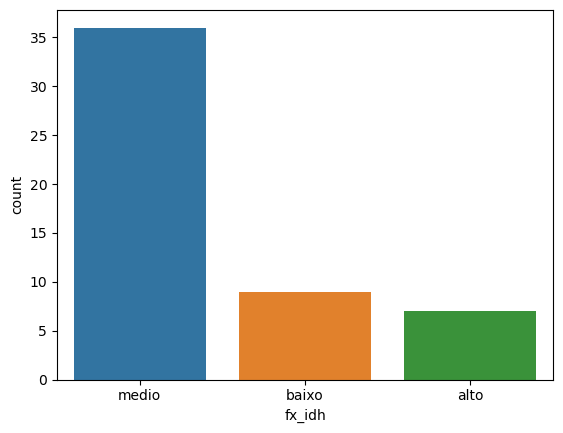

In [64]:
sns.countplot(data = dados_ro,
             x = 'fx_idh')

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [48]:
def faixas_ifdm(x):
    if x >= 0.6000:
        return('desenvolvimento moderado')
    if x >= 0.4562:
        return('desenvolvimento regular')
    return('desenvolvimento baixo')

In [49]:
dados_ro['fx_ifdm'] = dados_ro['ifdm'].map(faixas_ifdm)
dados_ro

,municipio,regiao,idh,ifdm,pib,fx_idh,fx_ifdm
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,medio,desenvolvimento moderado
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,baixo,desenvolvimento regular
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,medio,desenvolvimento regular
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,medio,desenvolvimento regular
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,alto,desenvolvimento moderado
5,Buritis,Ariquemes,0.616,0.6199,726000,medio,desenvolvimento moderado
6,Cabixi,Vilhena,0.650,0.5887,113031,medio,desenvolvimento regular
7,Cacaulândia,Ariquemes,0.646,0.5721,116635,medio,desenvolvimento regular
8,Cacoal,Cacoal,0.718,0.7111,2261644,alto,desenvolvimento moderado
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821,baixo,desenvolvimento regular


In [50]:
dados_ro.groupby('fx_ifdm')['municipio'].value_counts()

fx_ifdm                   municipio                
desenvolvimento moderado  Alta Floresta D'Oeste        1
                          Ariquemes                    1
                          Buritis                      1
                          Cacoal                       1
                          Candeias do Jamari           1
                          Cerejeiras                   1
                          Chupinguaia                  1
                          Colorado do Oeste            1
                          Jaru                         1
                          Ji-Paraná                    1
                          Monte Negro                  1
                          Ouro Preto do Oeste          1
                          Pimenta Bueno                1
                          Pimenteiras do Oeste         1
                          Porto Velho                  1
                          Presidente Médici            1
                          Primavera 

<Axes: xlabel='fx_ifdm', ylabel='count'>

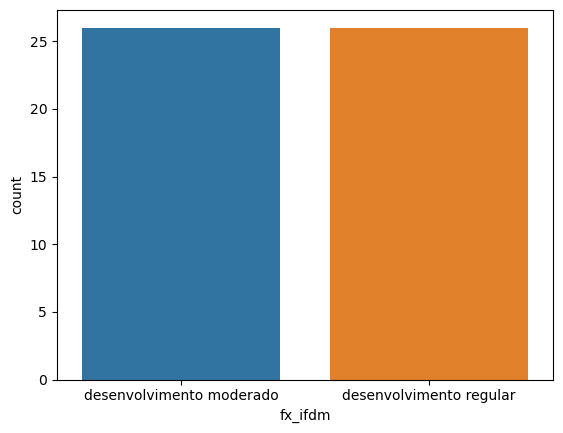

In [63]:
sns.countplot(data = dados_ro,
             x = 'fx_ifdm')

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [53]:
def faixas_pib(x):
    if x >= 1000000:
        return('acima de 1 bi')
    if x >= 500000:
        return('acima de 500 mi')
    if x >= 300000:
        return('acima de 300 mi')
    if x >= 200000:
        return('acima de 200 mi')
    if x >= 100000:
        return('acima de 100 mi')
    if x < 10000:
        return('até 100 mi')

In [54]:
dados_ro['fx_pib'] = dados_ro['pib'].map(faixas_pib)
dados_ro

,municipio,regiao,idh,ifdm,pib,fx_idh,fx_ifdm,fx_pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,medio,desenvolvimento moderado,acima de 300 mi
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,baixo,desenvolvimento regular,acima de 200 mi
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,medio,desenvolvimento regular,acima de 300 mi
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,medio,desenvolvimento regular,acima de 200 mi
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,alto,desenvolvimento moderado,acima de 1 bi
5,Buritis,Ariquemes,0.616,0.6199,726000,medio,desenvolvimento moderado,acima de 500 mi
6,Cabixi,Vilhena,0.650,0.5887,113031,medio,desenvolvimento regular,acima de 100 mi
7,Cacaulândia,Ariquemes,0.646,0.5721,116635,medio,desenvolvimento regular,acima de 100 mi
8,Cacoal,Cacoal,0.718,0.7111,2261644,alto,desenvolvimento moderado,acima de 1 bi
9,Campo Novo de Rondônia,Ariquemes,0.593,0.5272,208821,baixo,desenvolvimento regular,acima de 200 mi


In [55]:
dados_ro.groupby('fx_pib')['municipio'].value_counts()

fx_pib           municipio                
acima de 1 bi    Ariquemes                    1
                 Cacoal                       1
                 Jaru                         1
                 Ji-Paraná                    1
                 Pimenta Bueno                1
                 Porto Velho                  1
                 Rolim de Moura               1
                 Vilhena                      1
acima de 100 mi  Cabixi                       1
                 Cacaulândia                  1
                 Chupinguaia                  1
                 Corumbiara                   1
                 Costa Marques                1
                 Governador Jorge Teixeira    1
                 Itapuã do Oeste              1
                 Ministro Andreazza           1
                 Mirante da Serra             1
                 Novo Horizonte do Oeste      1
                 Santa Luzia D'Oeste          1
                 Seringueiras                

<Axes: xlabel='fx_pib', ylabel='count'>

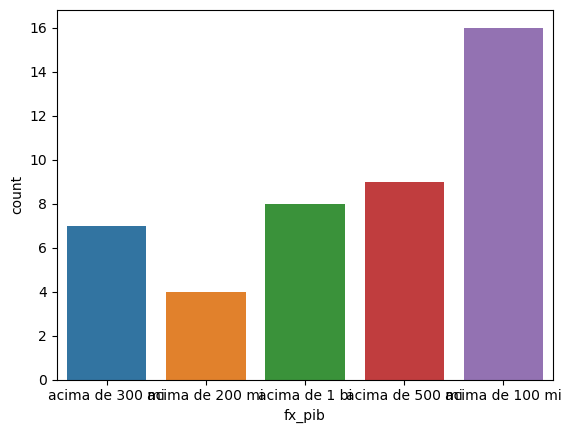

In [57]:
sns.countplot(data = dados_ro,
             x = 'fx_pib')

In [67]:
dados_ro.head()

,municipio,regiao,idh,ifdm,pib,fx_idh,fx_ifdm,fx_pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000,medio,desenvolvimento moderado,acima de 300 mi
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410,baixo,desenvolvimento regular,acima de 200 mi
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000,medio,desenvolvimento regular,acima de 300 mi
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098,medio,desenvolvimento regular,acima de 200 mi
4,Ariquemes,Ariquemes,0.702,0.7746,2579830,alto,desenvolvimento moderado,acima de 1 bi


<Axes: xlabel='idh', ylabel='fx_pib'>

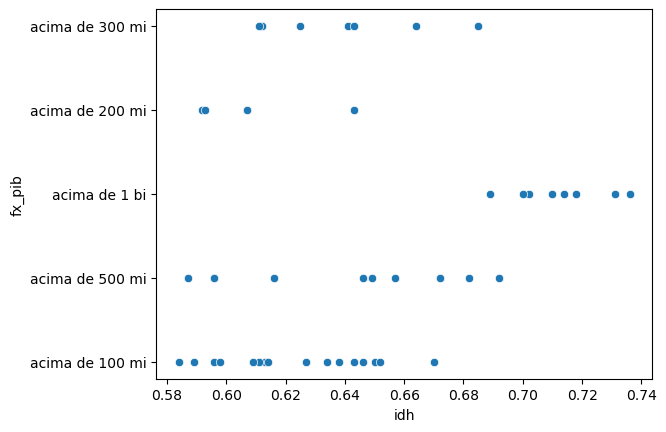

In [71]:
sns.scatterplot(data = dados_ro,
               x = 'idh',
               y = 'fx_pib')